# Selecting Collections

This tutorial shows how to select a collection and visualize a cube:

In [1]:
import cubo
import xarray as xr

This code creates a cube with an edge size of 64 pixels from Sentinel-2 and apply a cloud coverage filter of 40 percent. Get just the RGB bands:

In [2]:
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection="sentinel-2-l2a",
    bands=["B02","B03","B04"],
    start_date="2020-01-01",
    end_date="2021-01-01",
    edge_size=64,
    resolution=10,
    query={"eo:cloud_cover": {"lt": 40}}
)
da

/home/dmontero/.local/lib/python3.9/site-packages/stackstac/prepare.py:413: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  xs = pd.Float64Index(np.linspace(minx, maxx, width, endpoint=False))
/home/dmontero/.local/lib/python3.9/site-packages/stackstac/prepare.py:414: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ys = pd.Float64Index(np.linspace(maxy, miny, height, endpoint=False))


,Array,Chunk
Bytes,4.31 MiB,32.00 kiB
Shape,"(46, 3, 64, 64)","(1, 1, 64, 64)"
Count,415 Tasks,138 Chunks
Type,float64,numpy.ndarray


However, we can change the collection if we need to. This is an example using Landsat-8 Collection 2 Level 2 from Planetary Computer:

In [15]:
da = cubo.create(
    lat=47.848151988493385,
    lon=13.379491178028564,
    collection="landsat-c2-l2",
    bands=["blue","green","red"],
    start_date="2020-01-01",
    end_date="2021-01-01",
    edge_size=32,
    resolution=30,
    query={
        "eo:cloud_cover": {"lt": 50},
        "platform": {"eq": "landsat-8"}
    }
)
da

/home/dmontero/.local/lib/python3.9/site-packages/stackstac/prepare.py:413: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  xs = pd.Float64Index(np.linspace(minx, maxx, width, endpoint=False))
/home/dmontero/.local/lib/python3.9/site-packages/stackstac/prepare.py:414: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ys = pd.Float64Index(np.linspace(maxy, miny, height, endpoint=False))


<xarray.DataArray 'landsat-c2-l2' (time: 25, band: 3, y: 32, x: 32)>
dask.array<fetch_raster_window, shape=(25, 3, 32, 32), dtype=float64, chunksize=(1, 1, 32, 32), chunktype=numpy.ndarray>
Coordinates: (12/30)
  * time                         (time) datetime64[ns] 2020-01-11T09:58:09.42...
    id                           (time) <U31 'LC08_L2SP_192027_20200111_02_T1...
  * band                         (band) <U5 'blue' 'green' 'red'
  * x                            (x) float64 3.783e+05 3.783e+05 ... 3.792e+05
  * y                            (y) float64 5.301e+06 5.301e+06 ... 5.3e+06
    gsd                          int64 30
    ...                           ...
    title                        (band) <U10 'Blue Band' 'Green Band' 'Red Band'
    raster:bands                 object {'scale': 2.75e-05, 'nodata': 0, 'off...
    common_name                  (band) <U5 'blue' 'green' 'red'
    center_wavelength            (band) float64 0.48 0.56 0.65
    full_width_half_max          (band) float64 0.06 0.06 0.04
    epsg                         <U10 'EPSG:32633'
Attributes:
    collection:           landsat-c2-l2
    stac:                 https://planetarycomputer.microsoft.com/api/stac/v1
    epsg:                 EPSG:32633
    resolution:           30
    edge_size:            32
    central_lat:          47.848151988493385
    central_lon:          13.379491178028564
    central_y:            5300694.38448788
    central_x:            378764.6058600877
    time_coverage_start:  2020-01-01
    time_coverage_end:    2021-01-01

Visualize an RGB image per timestep in the cube:

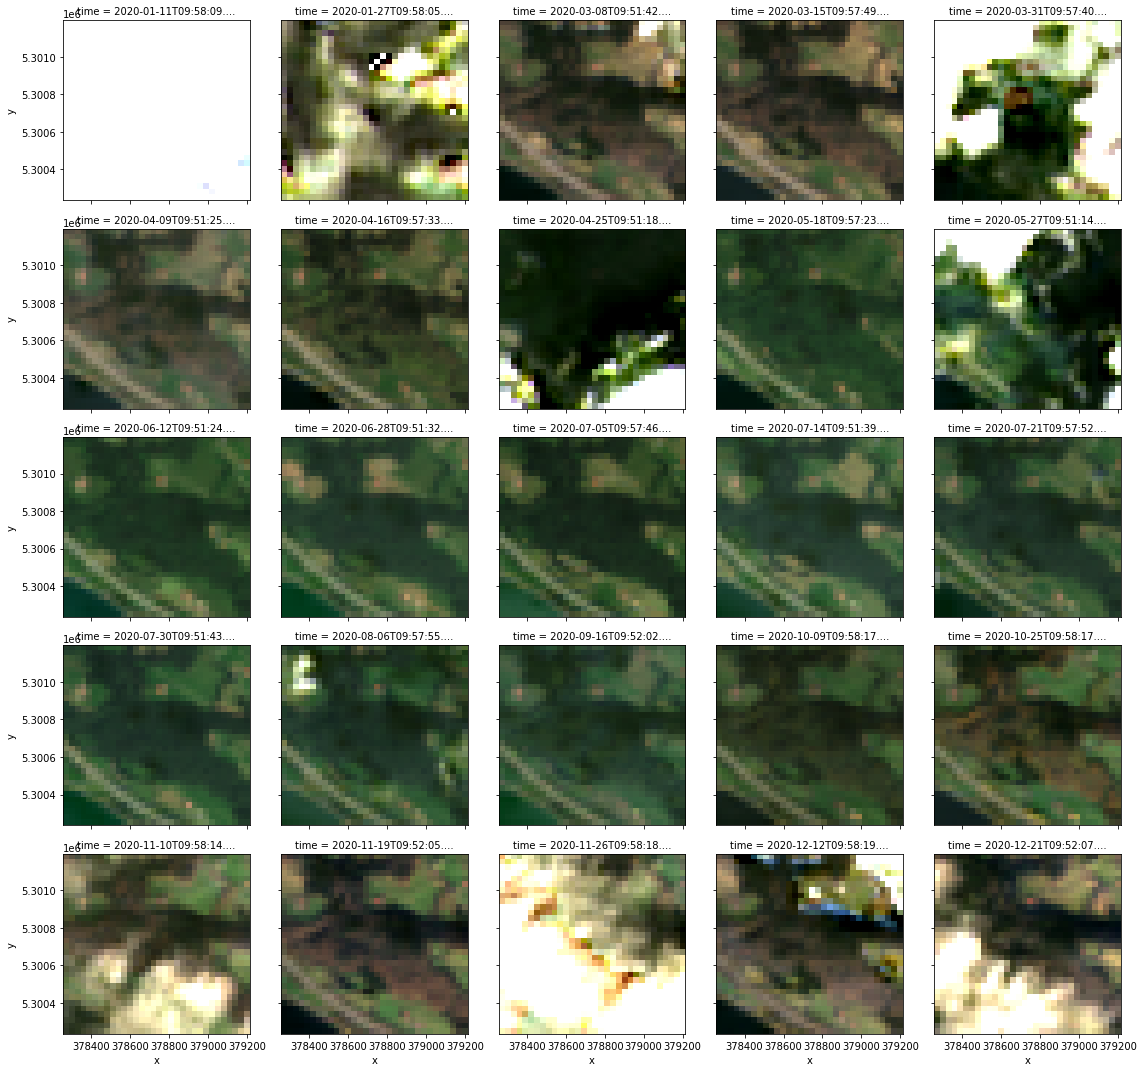

In [16]:
da = (da * 0.0000275) - 0.2
(da.sel(band=["red","green","blue"])/0.2).clip(0,1).plot.imshow(col="time",col_wrap = 5)